Number of Contours found = 44
m > k in contour 6
m > k in contour 38


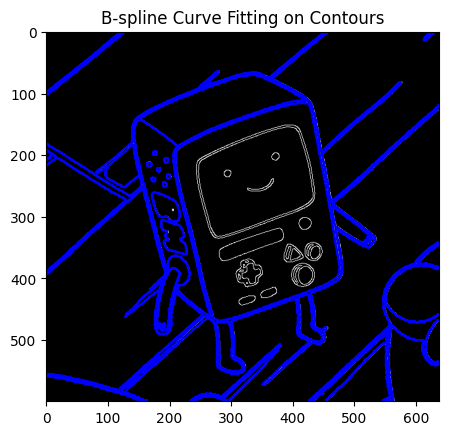

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
  
# Read image from dataset
image = cv2.imread("ZCS-138-CAPSTONE/dataset/a" + str(11) + ".jpg")

# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges and display the image
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged, cmap = "gray")

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
print("Number of Contours found = " + str(len(contours))) 

# New curves
curves = []

# B-spline curve fitting for ever contour
for i, contour in enumerate(contours):
    try:
        # Extract x and y coordinates of the contour points
        x, y = contour[:, 0, 0], contour[:, 0, 1]    

        # Fit B-spline curve to the contour points
        tck, u = splprep([x, y], s=3, per=True)

        # Evaluate the B-spline curve and optimize
        u_new = np.linspace(u.min(), u.max(), 1000)
        x_new, y_new = splev(u_new, tck)

        # Reconstruct the new x and y values to draw into image
        curve_points = np.column_stack((x_new.astype(int), y_new.astype(int)))
        curve_points = curve_points.reshape((-1, 1, 2))

        curves.append(curve_points)
    except TypeError:
        print(f'm > k in contour {i}')
        continue

for curve in curves:
    x, y = curve[:, 0, 0], curve[:, 0, 1]
    plt.plot(x, y, 'b-', label='B-spline Curve')

plt.title('B-spline Curve Fitting on Contours')
plt.show()